In [161]:
# import psycopg2
# import pandas as pd

# #Establishing the connection the database
# conn = psycopg2.connect(
#    database="TestDb", user='postgres', password='Tm1SA!SA!', host='localhost', port= '5432')

# #Creating a cursor object using the cursor() method
# cursor = conn.cursor()

# sql_query = pd.read_sql_query ('''
#                                SELECT
#                                *
#                                FROM house_train
#                                ''', conn)

# df = pd.DataFrame(sql_query)

# #Closing the connection
# conn.close()

###############################################################################################################################

import pandas as pd

#Read in the data as data frame
df = pd.read_csv('House_train_kaggle.csv')



In [209]:
#Print out some info on the data set
print(df[df["LotFrontage"] != 0]["LotFrontage"].mean())
print(df[df["LotFrontage"] != 0]["LotFrontage"].median())
print(df.info())
print(df.head())
print(df.describe().T)
print(df.isna().sum().sort_values(ascending=False)[:60])

70.04995836802665
69.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exte

In [223]:
#Normaliz & standardize(not in the statistical sense) the data
#We are just going to replace the values in the dataframe because we can always just reread the data.

#PoolQC is the pool quality if NA then there is not a pool.
df.PoolQC.fillna("none",inplace=True)

#MiscFeature is Miscellaneous feature and if NA then there are none.
df.MiscFeature.fillna("none",inplace=True)

#Alley should be none if NA.
df.Alley.fillna("none",inplace=True)

#Fence should be none if NA.
df.Fence.fillna("none",inplace=True)

#FireplaceQu is Fireplace quality and if NA then there is not a fireplace.
df.FireplaceQu.fillna("none",inplace=True)

#LotFrontage is Linear feet of street connected to property and should be replaaced with a non-zero number.
#We are going to use the meadian since there could be outlyers. The link below discusses
#https://stats.stackexchange.com/questions/143700/which-is-better-replacement-by-mean-and-replacement-by-median
df.LotFrontage.fillna(df[df["LotFrontage"] != 0]["LotFrontage"].median(),inplace=True)

#All the garage data seems to be consistant with a count of 81, so it is a good assumption that there is no garage.
#GarageCond is the Garage condition and if NA then there is no garage.
df.GarageCond.fillna("none",inplace=True)

#GarageType is Garage location and if NA then there is no garage.
df.GarageType.fillna("none",inplace=True)

#GarageYrBlt is the Year garage was built and if NA then there is no garage.
df.GarageYrBlt.fillna("none",inplace=True)

#GarageFinish is the Interior finish of the garage and if NA then there is no garage.
df.GarageFinish.fillna("none",inplace=True)

#GarageQual is the Garage quality and if NA then there is no garage.
df.GarageQual.fillna("none",inplace=True)

#BsmtExposure Refers to walkout or garden level walls and if NA than there is no basement.
df.BsmtExposure.fillna("none",inplace=True)

#BsmtFinType2 is the Rating of basement finished area (if multiple types) and if NA than there is no basement.
df.BsmtFinType2.fillna("none",inplace=True)

#BsmtFinType1 is the Rating of basement finished area and if NA than there is no basement.
df.BsmtFinType1.fillna("none",inplace=True)

#BsmtCond Evaluates the general condition of the basement and if NA than there is no basement.
df.BsmtCond.fillna("none",inplace=True)

#BsmtQual Evaluates the height of the basement and if NA than there is no basement.
df.BsmtQual.fillna("none",inplace=True)

#MasVnrArea is the Masonry veneer area in square feet and I think it is likely that NA=0.
df.MasVnrArea.fillna(0,inplace=True)

#MasVnrType is Masonry veneer type and if NA then None.
df.MasVnrType.fillna("none",inplace=True)

#Electrical is the Electrical system and if NA then the best assumption is SBrkr.
#This would only be an exceptable assumption in the US where this very standatd.
df.Electrical.fillna("SBrkr",inplace=True)

In [228]:
# #We can use this as a template to check the work above
# print(df[df["LotFrontage"] == 69.0]["LotFrontage"].count())


corr_mx = df.corr()
Top_corrs = corr_mx[corr_mx['SalePrice'] > 0.5]['SalePrice']

print(Top_corrs)

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


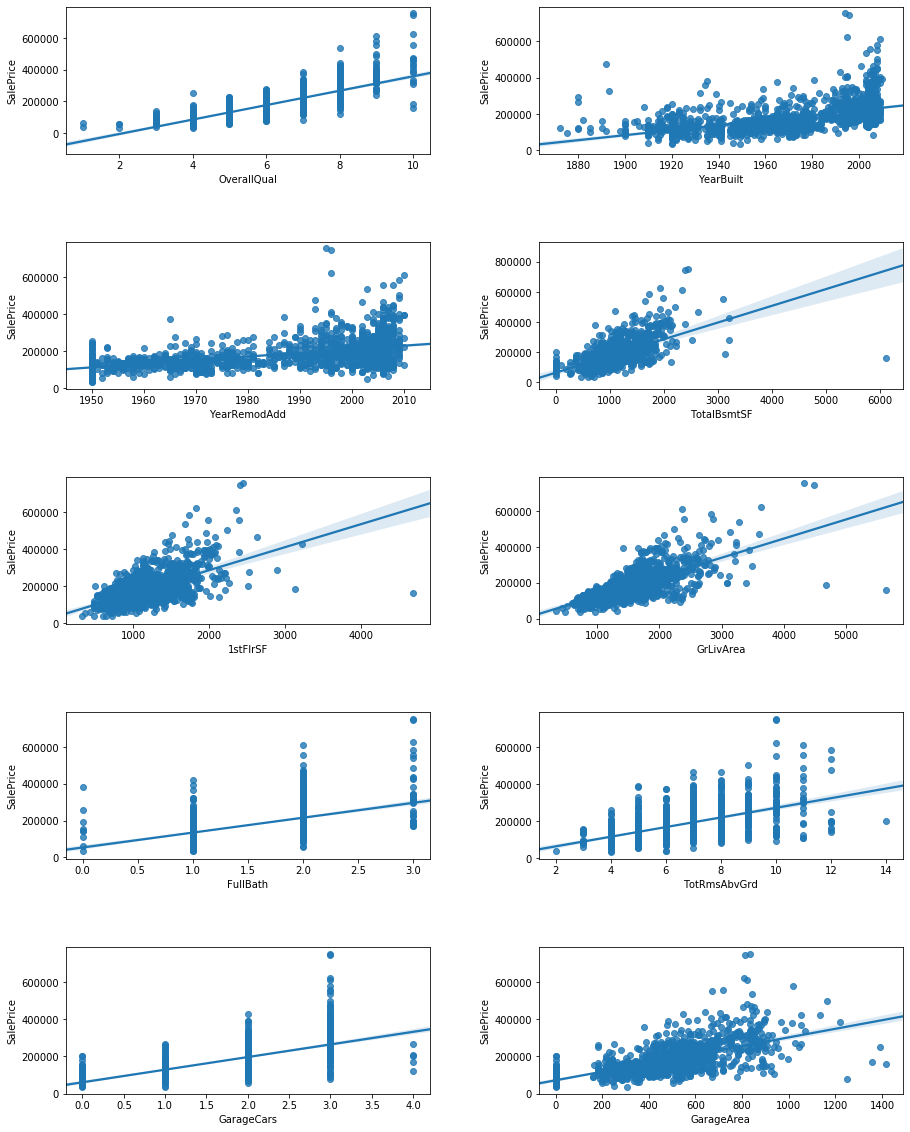

In [229]:
import seaborn as sns

i = 1
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=.6 ,wspace = .3)

for var in Top_corrs.index:
    if var not in ['SalePrice']:
        plt.subplot(5,2,i)
        sns.regplot(data = df[Top_corrs.index], x = df[Top_corrs.index][var], y = df[Top_corrs.index].SalePrice )
        i+=1

In [163]:
# We are replacing the categorical values with numerical values.
# We can just replace them without worry because we can always pull the data again

from sklearn.preprocessing import LabelEncoder

# df = df.fillna(value=0)

# print(df['mszoning'])
# cols = ['mszoning','salecondition']

# #Use the below to get a list, the hand edit.
# print(df.columns.tolist())

cols = ['mszoning', 'street', 'alley']#, 'lotshape']#, 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'poolqc', 'fence', 'mosold', 'saletype', 'salecondition']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

# for i in range(len(col)):
# #     label_encoder.fit_transform(df.iloc[:,i])
# #     print(df.iloc[:,i])
#     df.iloc[:,i] = label_encoder.fit_transform(df[col[i]])
#     #df.iloc[:,i] = label_encoder.fit_transform(df.iloc[:,i])

# OneHotEncoder().fit_transform(df)

# label_encoder.fit_transform(df.select_dtypes(exclude=['number','datetime']))

#print(df['mszoning'])

# # array([0, 1, 0, 2])

# # df['mszoning'] = df['mszoning'].replace(["A","C","FV","I","RH","RL","RP","RM"],[1,2,3,4,5,6,7,8])

print(df.alley)
print(df.fence)
print(df.mszoning)

KeyError: "None of [Index(['mszoning', 'street', 'alley'], dtype='object')] are in the [columns]"

21    4
22    3
23    4
24    3
25    3
26    3
27    3
28    3
29    4
30    0
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
Name: mszoning, dtype: int32


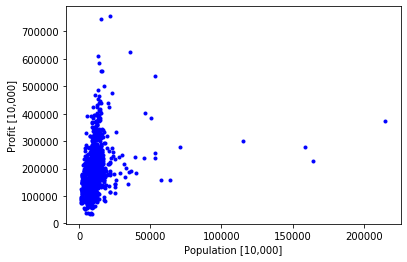

In [68]:
import matplotlib.pyplot as plt

print(df.mszoning[21:40])

x_4 = df.iloc[:,4]
x_2 = df.iloc[:2]
y = df.iloc[:,80]




plt.xlabel('Population [10,000]')
plt.ylabel('Profit [10,000]')
plt.plot(x_4, y, '.', color='b')

Text(0, 0.5, 'Price')

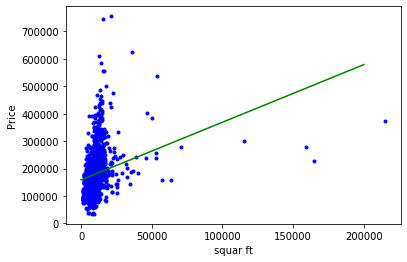

In [57]:
# Load packages/libraries
import sklearn
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Construct a linear model
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(np.c_[x_4],y)

plt.plot(x, y, '.', color='b')
plt.plot(np.array([0,200000]), lin_reg.predict(np.c_[np.array([0,200000])]), color='g', label='lin Reg')
plt.xlabel('squar ft')
plt.ylabel('Price')
